<a href="https://colab.research.google.com/github/Nathan-Mekuria-Solomon/ML-practice/blob/main/random_forest/ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples= 500, noise= 0.4, random_state= 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {"max_leaf_nodes" : list(range(2, 100)), "min_samples_split" : [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state= 42), params, verbose= 1, cv= 3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier()
log_clf = LogisticRegression()
svm_clf = SVC()

# hard voting
voting_clf = VotingClassifier(estimators= [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              voting= 'hard')

for clf in (rnd_clf, log_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_pred, y_test))

RandomForestClassifier 0.81
LogisticRegression 0.83
SVC 0.83
VotingClassifier 0.84


In [29]:
# soft voting
svm_clf_proba = SVC(probability= True)
voting_clf_soft = VotingClassifier(
    estimators= [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf_proba)],
    voting= 'soft'
)

for clf in (log_clf, rnd_clf, svm_clf_proba, voting_clf_soft):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_pred, y_test))

LogisticRegression 0.83
RandomForestClassifier 0.79
SVC 0.83
VotingClassifier 0.83


In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators= 500,
    max_samples= 100,
    bootstrap= True, # bagging: True, pasting: False
    n_jobs= -1       # parallel processing
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.83


In [31]:
tree_clf = DecisionTreeClassifier(random_state= 42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.82


In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes= [-1.5, 2.45, -1, 1.5], alpha= 0.5, contour= True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
  plt.contourf(x1, x2, y_pred, alpha= 0.3, cmap= custom_cmap)
  if contour:
    custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
    plt.contour(x1, x2, y_pred, cmap= custom_cmap2, alpha= 0.8)
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha= alpha)
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha= alpha)
  plt.axis(axes)
  plt.xlabel(r"$x_1$", fontsize= 18)
  plt.ylabel(r"$x_2$", fontsize= 18, rotation= 0)


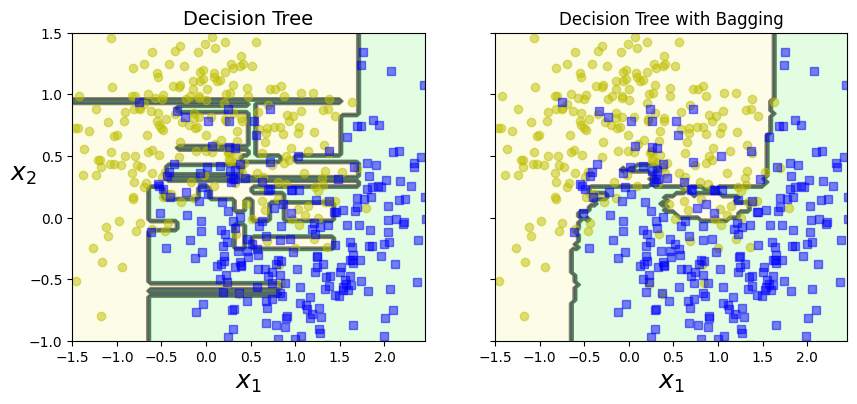

In [33]:
fig, axes = plt.subplots(ncols= 2, figsize= (10, 4), sharey= True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize= 14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with Bagging")
plt.ylabel("")
plt.show()

In [34]:
# out-of-the-bag score
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators= 500,
    bootstrap= True,
    n_jobs= -1,
    oob_score= True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.845

In [35]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8

In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators= 500,
    max_leaf_nodes= 16,
    n_jobs= -1
)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [37]:
y_pred_rnd = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [38]:
# Feature Importance
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(
    n_estimators= 500,
    n_jobs= -1
)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.09940014136896896
sepal width (cm) 0.025170054427566296
petal length (cm) 0.43054640573274305
petal width (cm) 0.44488339847072167


In [39]:
# Random Forest on MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version= 1, as_frame= False) # as_frame= True returns dataframe instead of numpy array
mnist.target = mnist.target.astype(np.uint8)

rnd_clf = RandomForestClassifier(
    n_estimators= 100,
    random_state= 42
)

rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [40]:
import matplotlib as mpl

def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap= mpl.cm.hot, interpolation= "nearest")
  plt.axis("off")

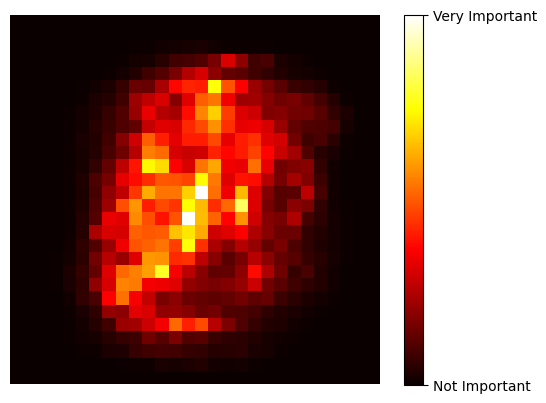

In [41]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks= [rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not Important", "Very Important"])
plt.show()

In [42]:
# Boosting
# AdaBoosting (Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth= 1),
    n_estimators= 200, # if overfit, decrease; if underfit, increase
    algorithm= "SAMME", # Stagewise Additive Modeling Using a Multiclass Exponential Loss Function, Real
    learning_rate= 0.5
)

ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [43]:
# Gradient Boosting
from sklearn.tree import DecisionTreeRegressor

In [44]:
# Creating Simple Quadratic Dataset
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5 # 100 x 1 matix of numbers -0.5 - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

In [45]:
tree_reg1 = DecisionTreeRegressor(max_depth= 2, random_state= 42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [46]:
y_pred = tree_reg1.predict(X)
y2 = y - y_pred

In [47]:
tree_reg2 = DecisionTreeRegressor(max_depth= 2, random_state= 42)
tree_reg2.fit(X, y2)
y_pred = tree_reg2.predict(X)
y3 = y2 - y_pred

In [48]:
tree_reg3 = DecisionTreeRegressor(max_depth= 2, random_state= 42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [49]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

In [50]:
# figure for gradient boosting
def plot_predictions(regressors, X, y, axes, label= None, style= "r-", data_style= "b.", data_label= None):
  x1 = np.linspace(axes[0], axes[1], 500)
  y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors) # boundary line
  plt.plot(X[:, 0], y, data_style, label= data_label)
  plt.plot(x1, y_pred, style, linewidth= 2, label= label)
  if label or data_label:
    plt.legend(loc= "upper center", fontsize= 16)
  plt.axis(axes)

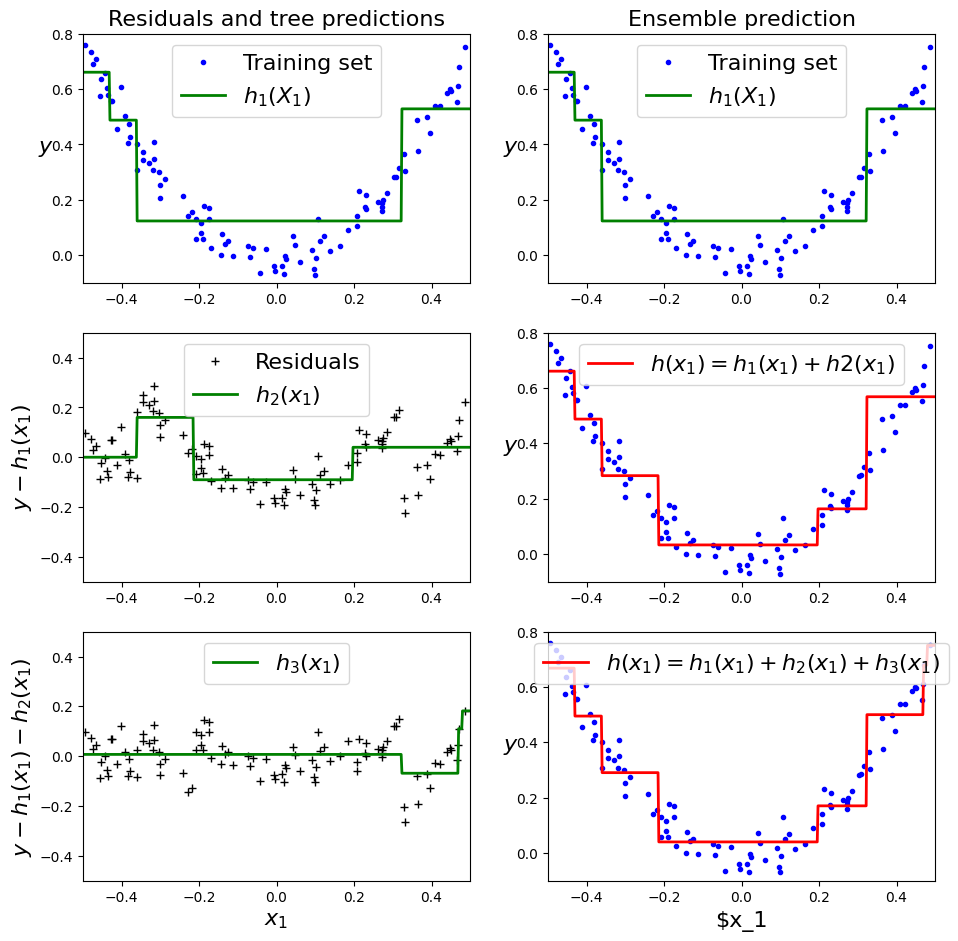

In [51]:
plt.figure(figsize= (11, 11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes= [-0.5, 0.5, -0.1, 0.8], label= "$h_1(X_1)$", style= "g-", data_label= "Training set")
plt.ylabel("$y$", fontsize= 16, rotation= 0)
plt.title("Residuals and tree predictions", fontsize= 16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes= [-0.5, 0.5, -0.1, 0.8], label= "$h_1(X_1)$", style= "g-", data_label= "Training set")
plt.ylabel("$y$", fontsize= 16, rotation= 0)
plt.title("Ensemble prediction", fontsize= 16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes= [-0.5, 0.5, -0.5, 0.5], label= "$h_2(x_1)$", style= "g-", data_style= "k+", data_label= "Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize= 16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes= [-0.5, 0.5, -0.1, 0.8], label= "$h(x_1) = h_1(x_1) + h2(x_1)$")
plt.ylabel("$y$", fontsize= 16, rotation= 0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes= [-0.5, 0.5, -0.5, 0.5], label= "$h_3(x_1)$", style= "g-", data_style= "k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize= 16)
plt.xlabel("$x_1$", fontsize= 16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes= [-0.5, 0.5, -0.1, 0.8], label= "$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1", fontsize= 16)
plt.ylabel("$y$", fontsize= 16, rotation= 0)

plt.show()

In [2]:
# best number of estimators
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbrt = GradientBoostingRegressor(
    max_depth= 2,
    n_estimators= 120
)

gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_pred, y_test) for y_pred in gbrt.stagged_predict(X_test)]
bst_n_estimators = np.argmin(errors)

gbrt_bst = GradientBoostingRegressor(
    max_depth= 2,
    n_estimators= bst_n_estimators
)
gbrt_bst.fit(X_train, y_train)

NameError: name 'X' is not defined

In [ ]:
# early stopping
gbrt = GradientBoostingRegressor(
    max_depth= 2,
    n_estimators= 120
)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred = gbrt.predict(X_test)
  error = mean_squared_error(y_pred, y_test)
  if error < min_error:
    min_error = error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break # early stop